In [1]:
import pandas as pd
import numpy as np
import gmplot

import matplotlib.pyplot as plt

import folium
from IPython.display import display

import sklearn
import sklearn.preprocessing as pre
import sklearn.model_selection as mdl

import random

In [2]:
accident1 = pd.read_csv('../RawData/KSI(1999-2014).csv')
accident2 = pd.read_csv('../RawData/KSI(2008-2018).csv')

In [3]:
accident = accident2[['DATE','LATITUDE', 'LONGITUDE', 'STREET1', 'STREET2', 'ROAD_CLASS', 'District', 
                      'LOCCOORD', 'ACCLOC', 'INJURY', 'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 
                      'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL']]

In [4]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12244 entries, 0 to 12243
Data columns (total 18 columns):
DATE          12244 non-null object
LATITUDE      12244 non-null float64
LONGITUDE     12244 non-null float64
STREET1       12244 non-null object
STREET2       12244 non-null object
ROAD_CLASS    12244 non-null object
District      12244 non-null object
LOCCOORD      12244 non-null object
ACCLOC        12244 non-null object
INJURY        12244 non-null object
INITDIR       12244 non-null object
VEHTYPE       12244 non-null object
MANOEUVER     12244 non-null object
DRIVACT       12244 non-null object
SPEEDING      12244 non-null object
AG_DRIV       12244 non-null object
REDLIGHT      12244 non-null object
ALCOHOL       12244 non-null object
dtypes: float64(2), object(16)
memory usage: 1.7+ MB


In [5]:
accident.head()

,DATE,LATITUDE,LONGITUDE,STREET1,STREET2,ROAD_CLASS,District,LOCCOORD,ACCLOC,INJURY,INITDIR,VEHTYPE,MANOEUVER,DRIVACT,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL
0,2017-06-03T04:00:00.000Z,43.675280,-79.454730,ST CLAIR AVE W,CALEDONIA RD,Major Arterial,Toronto and East York,Intersection,Intersection Related,Major,West,Bicycle,Going Ahead,,,Yes,,
1,2017-09-25T04:00:00.000Z,43.770049,-79.520641,4673 JANE ST,,Major Arterial,Etobicoke York,Mid-Block,Non Intersection,None,North,"Automobile, Station Wagon",Going Ahead,Driving Properly,Yes,Yes,,
2,2017-09-25T04:00:00.000Z,43.770049,-79.520641,4673 JANE ST,,Major Arterial,Etobicoke York,Mid-Block,Non Intersection,Major,East,,,,Yes,Yes,,
3,2017-12-01T05:00:00.000Z,43.751868,-79.286601,BIRCHMOUNT RD,MERRYFIELD DR,Major Arterial,Scarborough,Intersection,At Intersection,None,North,Passenger Van,Going Ahead,Driving Properly,,,,
4,2017-12-01T05:00:00.000Z,43.751868,-79.286601,BIRCHMOUNT RD,MERRYFIELD DR,Major Arterial,Scarborough,Intersection,At Intersection,Fatal,East,,,,,,,


In [6]:
accident["DATE"] = pd.to_datetime(accident["DATE"])
accident.index = accident["DATE"]

C:\Users\Tanvy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [7]:
pd.unique(accident['DATE'].dt.year)

array([2017, 2008, 2014, 2015, 2018, 2013, 2009, 2010, 2012, 2016, 2011], dtype=int64)

In [8]:
accident.head()

,DATE,LATITUDE,LONGITUDE,STREET1,STREET2,ROAD_CLASS,District,LOCCOORD,ACCLOC,INJURY,INITDIR,VEHTYPE,MANOEUVER,DRIVACT,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL
DATE,,,,,,,,,,,,,,,,,,
2017-06-03 04:00:00,2017-06-03 04:00:00,43.675280,-79.454730,ST CLAIR AVE W,CALEDONIA RD,Major Arterial,Toronto and East York,Intersection,Intersection Related,Major,West,Bicycle,Going Ahead,,,Yes,,
2017-09-25 04:00:00,2017-09-25 04:00:00,43.770049,-79.520641,4673 JANE ST,,Major Arterial,Etobicoke York,Mid-Block,Non Intersection,None,North,"Automobile, Station Wagon",Going Ahead,Driving Properly,Yes,Yes,,
2017-09-25 04:00:00,2017-09-25 04:00:00,43.770049,-79.520641,4673 JANE ST,,Major Arterial,Etobicoke York,Mid-Block,Non Intersection,Major,East,,,,Yes,Yes,,
2017-12-01 05:00:00,2017-12-01 05:00:00,43.751868,-79.286601,BIRCHMOUNT RD,MERRYFIELD DR,Major Arterial,Scarborough,Intersection,At Intersection,None,North,Passenger Van,Going Ahead,Driving Properly,,,,
2017-12-01 05:00:00,2017-12-01 05:00:00,43.751868,-79.286601,BIRCHMOUNT RD,MERRYFIELD DR,Major Arterial,Scarborough,Intersection,At Intersection,Fatal,East,,,,,,,


In [9]:
accident = accident.replace(' ', np.NAN, regex=False)

In [10]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12244 entries, 2017-06-03 04:00:00 to 2011-06-26 04:00:00
Data columns (total 18 columns):
DATE          12244 non-null datetime64[ns]
LATITUDE      12244 non-null float64
LONGITUDE     12244 non-null float64
STREET1       12244 non-null object
STREET2       11191 non-null object
ROAD_CLASS    12223 non-null object
District      12222 non-null object
LOCCOORD      12169 non-null object
ACCLOC        8348 non-null object
INJURY        10915 non-null object
INITDIR       8821 non-null object
VEHTYPE       10095 non-null object
MANOEUVER     7022 non-null object
DRIVACT       6180 non-null object
SPEEDING      2035 non-null object
AG_DRIV       6324 non-null object
REDLIGHT      959 non-null object
ALCOHOL       487 non-null object
dtypes: datetime64[ns](1), float64(2), object(15)
memory usage: 1.8+ MB


In [11]:
accident["District"][accident["District"].isnull()]
print(len(accident["District"][accident["District"].isnull()]))
accident["District"][accident["District"].isnull()] = "Scarborough"
print(len(accident["District"][accident["District"].isnull()]))


22
0


C:\Users\Tanvy\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
accident["ROAD_CLASS"][accident["ROAD_CLASS"].isnull()]
print(len(accident["ROAD_CLASS"][accident["ROAD_CLASS"].isnull()]))
accident["ROAD_CLASS"][accident["ROAD_CLASS"].isnull()] = "Major Arterial"
print(len(accident["ROAD_CLASS"][accident["ROAD_CLASS"].isnull()]))


21
0


C:\Users\Tanvy\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
accident["STREET2"][accident["STREET2"].isnull()]
print(len(accident["STREET2"][accident["STREET2"].isnull()]))
accident["STREET2"][accident["STREET2"].isnull()] = "Major Arterial"
print(len(accident["STREET2"][accident["STREET2"].isnull()]))


1053
0


C:\Users\Tanvy\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
accident["LOCCOORD"][accident["LOCCOORD"].isnull()]
print(len(accident["LOCCOORD"][accident["LOCCOORD"].isnull()]))
accident["LOCCOORD"][accident["LOCCOORD"].isnull()] = "Intersection"
print(len(accident["LOCCOORD"][accident["LOCCOORD"].isnull()]))


75
0


C:\Users\Tanvy\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
accident["ACCLOC"][accident["ACCLOC"].isnull()]
print(len(accident["ACCLOC"][accident["ACCLOC"].isnull()]))
accident["ACCLOC"][accident["ACCLOC"].isnull()] = "Non Intersection"
print(len(accident["ACCLOC"][accident["ACCLOC"].isnull()]))


3896
0


C:\Users\Tanvy\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
accident["INJURY"][accident["INJURY"].isnull()]
print(len(accident["INJURY"][accident["INJURY"].isnull()]))
accident["INJURY"][accident["INJURY"].isnull()] = "Fatal"
print(len(accident["INJURY"][accident["INJURY"].isnull()]))


1329
0


C:\Users\Tanvy\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
accident["INITDIR"][accident["INITDIR"].isnull()]
print(len(accident["INITDIR"][accident["INITDIR"].isnull()]))
accident["INITDIR"][accident["INITDIR"].isnull()] = "North"
print(len(accident["INITDIR"][accident["INITDIR"].isnull()]))


3423
0


C:\Users\Tanvy\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
accident["VEHTYPE"][accident["VEHTYPE"].isnull()]
print(len(accident["VEHTYPE"][accident["VEHTYPE"].isnull()]))
accident["VEHTYPE"][accident["VEHTYPE"].isnull()] = "Other"
print(len(accident["VEHTYPE"][accident["VEHTYPE"].isnull()]))


2149
0


C:\Users\Tanvy\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
0-4, 0-4, 1-2, 0-4, 0-4, 0-4, 0-11

In [19]:
from sklearn import preprocessing
enc = preprocessing.LabelEncoder()
enc.fit(accident["District"])
new_cat_features = enc.transform(accident["District"])
print(new_cat_features) # [1 2 0]
accident["District"] = new_cat_features


[4 0 0 ..., 1 1 1]


In [20]:
from sklearn import preprocessing
enc = preprocessing.LabelEncoder()
enc.fit(accident["ROAD_CLASS"])
new_cat_features = enc.transform(accident["ROAD_CLASS"])
print(new_cat_features) # [1 2 0]
accident["ROAD_CLASS"] = new_cat_features

[4 4 4 ..., 4 4 4]


In [21]:
from sklearn import preprocessing
enc = preprocessing.LabelEncoder()
enc.fit(accident["LOCCOORD"])
new_cat_features = enc.transform(accident["LOCCOORD"])
print(new_cat_features) # [1 2 0]
accident["LOCCOORD"] = new_cat_features

[1 2 2 ..., 1 1 1]


In [22]:
from sklearn import preprocessing
enc = preprocessing.LabelEncoder()
enc.fit(accident["ACCLOC"])
new_cat_features = enc.transform(accident["ACCLOC"])
print(new_cat_features) # [1 2 0]
accident["ACCLOC"] = new_cat_features

[2 4 4 ..., 0 0 0]


In [23]:
from sklearn import preprocessing
enc = preprocessing.LabelEncoder()
enc.fit(accident["INJURY"])
new_cat_features = enc.transform(accident["INJURY"])
print(new_cat_features) # [1 2 0]
accident["INJURY"] = new_cat_features

[1 4 1 ..., 1 0 4]


In [24]:
from sklearn import preprocessing
enc = preprocessing.LabelEncoder()
enc.fit(accident["INITDIR"])
new_cat_features = enc.transform(accident["INITDIR"])
print(new_cat_features) # [1 2 0]
accident["INITDIR"] = new_cat_features

[4 1 0 ..., 0 1 1]


In [25]:
from sklearn import preprocessing
enc = preprocessing.LabelEncoder()
enc.fit(accident["VEHTYPE"])
new_cat_features = enc.transform(accident["VEHTYPE"])
print(new_cat_features) # [1 2 0]
accident["VEHTYPE"] = new_cat_features

[ 1  0 11 ...,  0 11  0]


In [26]:
accidentValue = accident.iloc[:, 5:12]
accidentValue = accidentValue.reset_index()
accidentValue = accidentValue.drop(['DATE'], axis=1)

In [27]:
accidentValue = accidentValue.values

In [28]:
accidentValue[0]

array([4, 4, 1, 2, 1, 4, 1], dtype=int64)

In [37]:
import sklearn.cluster as cluster
kmeans = cluster.KMeans(n_clusters=3, init="k-means++", max_iter=300, n_init=10, random_state=0)
yMeans = kmeans.fit_predict(accidentValue)
yMeans

array([0, 0, 1, ..., 0, 1, 0])

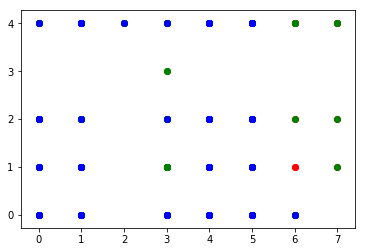

In [30]:
plt.scatter(accidentValue[yMeans==0, 0], accidentValue[yMeans==0, 1], color="r")
plt.scatter(accidentValue[yMeans==1, 0], accidentValue[yMeans==1, 1], color="g")
plt.scatter(accidentValue[yMeans==2, 0], accidentValue[yMeans==2, 1], color="b")
plt.show()

In [31]:
import sklearn.model_selection as mdl
import sklearn.metrics as mat
import sklearn.svm as svm


In [32]:
classifier = svm.SVC(kernel='linear', random_state=0)
classifier.fit(accidentValue, yMeans)
    

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
X_test  = [['', '', '', '' ,'', '', '']]
predic  = classifier.predict(X_test)
print(predic)    

In [ ]:
2017-06-03T04:00:00.000Z 	43.675280 	-79.454730 	ST CLAIR AVE W 	CALEDONIA RD 	Major Arterial 	Toronto and East York 	Intersection 	Intersection Related 	Major 	West 	Bicycle 	Going Ahead 			